In [69]:
import numpy as np
import matplotlib.pyplot as plt
import math

Numpy provides an n-dimensional array object, and many functions for manipulating these arrays. Numpy is a generic framework for scientific computing; it does not know anything about computation graphs, or deep learning, or gradients. However we can easily use numpy to fit a third order polynomial to sine function by manually implementing the forward and backward passes through the network using numpy operations:

In [70]:
# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

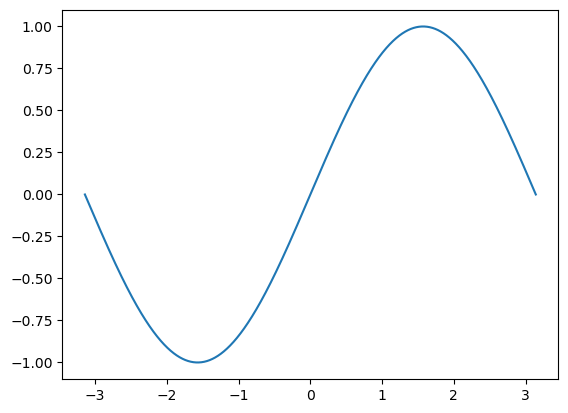

In [71]:
plt.plot(x, y)
plt.show()

In [72]:
# Define a polynomial model to approximate the y

#   Randomly initialize parameters
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

# y = a + b x + c x^2 + d x^3
y_pred = a + b * x + c * x ** 2 + d * x ** 3

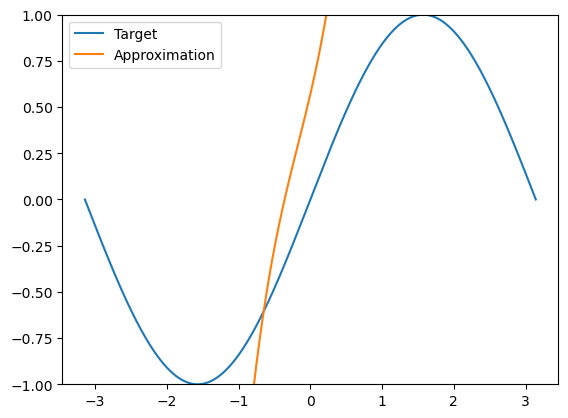

In [73]:
# plot lines 
plt.plot(x, y, label = "Target") 
plt.plot(x, y_pred, label = "Approximation") 
plt.ylim(-1, 1)
plt.legend() 
plt.show()

In the following cell we will update the parameters of the polynomial in turn\
upadate the predicted curve in a way it become closer to the target trigonmetric curve.

Mathmatically we are considering the relation between parameters and loss.\
Where loss is hte difference between the predicted curve and the target curve.\
Any relationship is a function:

$$
f(a,b,c,d) = (y_{pred} - y)^2
$$

We want to decrease the value of the loss or our function.\
This function is a manifold that have local and global minimas.\
We need to reach thos minimas. We move on the manifold in a direction\
that minimizes the minima. We change the four parameters in a direction\
that decreases the minima.

To achive this we compute the gradient. Mathmatically the gradient is the \
the direction of greatest change of a function. The gradient of a scalar-valued \
multivariable function packages all its partial derivative information into a vector:

$$
 \triangledown f = \begin{bmatrix}
           \frac{\partial f}{\partial a}  \\
           \\
           \frac{\partial f}{\partial b} \\
           \\
           \frac{\partial f}{\partial c} \\
           \\
           \frac{\partial f}{\partial d} \\
         \end{bmatrix}
$$

We move slightly in this direction. 

In [ ]:
# Update parameters using back propagation to match target
learning_rate = 1e-6

for t in range(2000):

    # Compute predictor
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss = (y_pred - y)^2
    loss = np.square(y_pred - y).sum()

    # Compute derevative of loss = 2 * (y_pred - y)
    grad_y_pred = 2.0 * (y_pred - y)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update parameters
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

    if t % 100 == 0:
        print(t, loss)

    if t == 10:
        y_pred_10 = y_pred.copy()
    if t == 100:
        y_pred_100 = y_pred.copy()
    if t == 500:
        y_pred_500 = y_pred.copy()
    if t == 1000:
        y_pred_1000 = y_pred.copy()
    if t == 1500:
        y_pred_1500 = y_pred.copy()



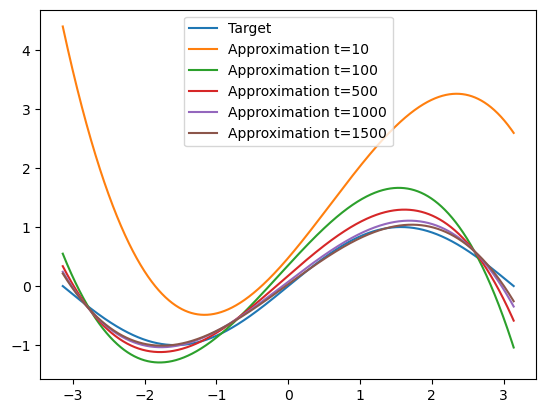

In [77]:
# plot lines 
plt.plot(x, y, label = "Target") 
plt.plot(x, y_pred_10, label = "Approximation t=10") 
plt.plot(x, y_pred_100, label = "Approximation t=100") 
plt.plot(x, y_pred_500, label = "Approximation t=500")
plt.plot(x, y_pred_1000, label = "Approximation t=1000")
plt.plot(x, y_pred_1500, label = "Approximation t=1500")
plt.legend() 
plt.show()

Numpy is a great framework, but it cannot utilize GPUs to accelerate its numerical\
computations. For modern deep neural networks, GPUs often provide speedups of 50x or\
greater, so unfortunately numpy won’t be enough for modern deep learning.